In [ ]:
conda activate pyvizenv

In [ ]:
pip install yfinance

In [3]:
# Import Libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import panel as pn
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
pn.extension('plotly')
import plotly.express as px
import yfinance as yf

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Laod .env environment
load_dotenv()


True

In [5]:
# Pull in API Key
api_key = os.getenv("glassnode_api")
type(api_key)


str

In [6]:
# Define crypto currencies to pull
crypto_list = ["BTC", "BCH", "ETH", "LTC", "USDT", "DOGE"]


In [7]:
# Define Market URLs
price_url = 'https://api.glassnode.com/v1/metrics/market/price_usd'
volume_url = 'https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum'
mkt_cap_url = 'https://api.glassnode.com/v1/metrics/market/marketcap_usd'

# Define Demand URLs
total_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/count'
sending_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/sending_count'
receiving_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/receiving_count'
active_addresses_url = 'https://api.glassnode.com/v1/metrics/addresses/active_count'
transactions_url = 'https://api.glassnode.com/v1/metrics/transactions/count'

# Define Supply URLs
circulating_supply_url = 'https://api.glassnode.com/v1/metrics/supply/current'

# Define Mining Revenue URLs
mining_revenue_sum_url = 'https://api.glassnode.com/v1/metrics/mining/revenue_sum'

# Define Indicator URLs
rhodl_ratio_url = 'https://api.glassnode.com/v1/metrics/indicators/rhodl_ratio'


## BTC API Data Pull

In [8]:
# Price API Request
btc_price_res = requests.get(price_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
btc_price_df = pd.read_json(btc_price_res.text, convert_dates=['t'])
btc_price_df.columns = ['Date', 'BTC Price']
btc_price_df.set_index('Date', inplace=True) 


# Volume API Request
btc_volume_res = requests.get(volume_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert volume to Pandas Dataframe, set index to time and clean up file
btc_volume_df = pd.read_json(btc_volume_res.text, convert_dates=['t'])
btc_volume_df.columns = ['Date', 'BTC Volume']
btc_volume_df.set_index('Date', inplace=True)



# Market Cap API Request
btc_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
btc_mkt_cap_df = pd.read_json(btc_mkt_cap_res.text, convert_dates=['t'])
btc_mkt_cap_df.columns = ['Date', 'BTC Market Cap']
btc_mkt_cap_df.set_index('Date', inplace=True)



# Mining API Request
btc_mining_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Mining to Pandas Dataframe, set index to time and clean up file
btc_mining_df = pd.read_json(btc_mining_res.text, convert_dates=['t'])
btc_mining_df.columns = ['Date', 'BTC Mining Revenue']
btc_mining_df.set_index('Date', inplace=True)



# RHODL API Request
btc_rhodl_res = requests.get(rhodl_ratio_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert RHODL to Pandas Dataframe, set index to time and clean up file
btc_rhodl_df = pd.read_json(btc_rhodl_res.text, convert_dates=['t'])
btc_rhodl_df.columns = ['Date', 'BTC RHDOL Ratio']
btc_rhodl_df.set_index('Date', inplace=True)


# Supply API Request
btc_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Supply to Pandas Dataframe, set index to time and clean up file
btc_supply_df = pd.read_json(btc_supply_res.text, convert_dates=['t'])
btc_supply_df.columns = ['Date', 'BTC Supply']
btc_supply_df.set_index('Date', inplace=True)


# Total Addresses API Request
btc_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Total Addresses to Pandas Dataframe, set index to time and clean up file
btc_total_addresses_df = pd.read_json(btc_total_addresses_res.text, convert_dates=['t'])
btc_total_addresses_df.columns = ['Date', 'BTC Total Addresses']
btc_total_addresses_df.set_index('Date', inplace=True)


# Sending Addresses API Request
btc_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Sending Addresses to Pandas Dataframe, set index to time and clean up file
btc_sending_addresses_df = pd.read_json(btc_sending_addresses_res.text, convert_dates=['t'])
btc_sending_addresses_df.columns = ['Date', 'BTC Sending Addresses']
btc_sending_addresses_df.set_index('Date', inplace=True)


# Receiving Addresses API Request
btc_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Receiving Addresses to Pandas Dataframe, set index to time and clean up file
btc_receiving_addresses_df = pd.read_json(btc_receiving_addresses_res.text, convert_dates=['t'])
btc_receiving_addresses_df.columns = ['Date', 'BTC Receiving Addresses']
btc_receiving_addresses_df.set_index('Date', inplace=True)



# Active Addresses API Request
btc_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
btc_active_addresses_df = pd.read_json(btc_active_addresses_res.text, convert_dates=['t'])
btc_active_addresses_df.columns = ['Date', 'BTC Active Addresses']
btc_active_addresses_df.set_index('Date', inplace=True)



# Transactions API Request
btc_transactions_res = requests.get(transactions_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
btc_transactions_df = pd.read_json(btc_transactions_res.text, convert_dates=['t'])
btc_transactions_df.columns = ['Date','BTC Transactions']
btc_transactions_df.set_index('Date', inplace=True)



## BTC Data Table Debugging Cells

In [ ]:
# btc_price_df

In [ ]:
# btc_volume_df

In [ ]:
# btc_mkt_cap_df

In [ ]:
# btc_mining_df

In [ ]:
# btc_rhodl_df

In [ ]:
# btc_supply_df

In [ ]:
# btc_total_addresses_df

In [ ]:
# btc_sending_addresses_df

In [ ]:
# btc_receiving_addresses_df

In [ ]:
# btc_active_addresses_df

In [ ]:
# btc_transactions_df

## BTC Daily Changes

In [9]:
# Daily change in price column
btc_daily_price_pct_change = btc_price_df.pct_change(1)
btc_daily_price_pct_change.columns = ['BTC Daily Price Change (%)']

# btc_daily_price_pct_change


## BTC Cumulative Return

In [74]:
# Adding the cumulative return column
btc_cumulative_return = (1 + btc_daily_price_pct_change).cumprod() - 1
btc_cumulative_return.columns = ['BTC Cumulative Return (%)']

# btc_cumulative_return


## BTC Data Aggregating & Cleaning

In [75]:
# Define all the different data frames into a list
btc_frames = [btc_price_df,
              btc_daily_price_pct_change,
              btc_cumulative_return,
              btc_volume_df,
              btc_mkt_cap_df,
              btc_mining_df,
              btc_rhodl_df,
              btc_supply_df,
              btc_total_addresses_df,
              btc_sending_addresses_df,
              btc_receiving_addresses_df,
              btc_active_addresses_df,
              btc_transactions_df]

# Concatenate all the dataframes into one
btc_data = pd.concat(btc_frames, axis=1, join="outer", ignore_index=False)
btc_data


BTC Price  BTC Daily Price Change (%)  \
Date                                                   
2009-01-03           NaN                         NaN   
2009-01-04           NaN                         NaN   
2009-01-05           NaN                         NaN   
2009-01-06           NaN                         NaN   
2009-01-07           NaN                         NaN   
2009-01-08           NaN                         NaN   
2009-01-09           NaN                         NaN   
2009-01-10           NaN                         NaN   
2009-01-11           NaN                         NaN   
2009-01-12           NaN                         NaN   
2009-01-13           NaN                         NaN   
2009-01-14           NaN                         NaN   
2009-01-15           NaN                         NaN   
2009-01-16           NaN                         NaN   
2009-01-17           NaN                         NaN   
2009-01-18           NaN                         NaN   
2009-01-19           NaN                         NaN   
2009-01-20           NaN                         NaN   
2009-01-21           NaN                         NaN   
2009-01-22           NaN                         NaN   
2009-01-23           NaN                         NaN   
2009-01-24           NaN                         NaN   
2009-01-25           NaN                         NaN   
2009-01-26           NaN                         NaN   
2009-01-27           NaN                         NaN   
2009-01-28           NaN                         NaN   
2009-01-29           NaN                         NaN   
2009-01-30           NaN                         NaN   
2009-01-31           NaN                         NaN   
2009-02-01           NaN                         NaN   
...                  ...                         ...   
2021-02-13  47067.939135                   -0.008738   
2021-02-14  48747.452442                    0.035683   
2021-02-15  47984.954754                   -0.015642   
2021-02-16  49175.900516                    0.024819   
2021-02-17  52138.044988                    0.060236   
2021-02-18  51649.575436                   -0.009369   
2021-02-19  55776.188813                    0.079896   
2021-02-20  56134.544152                    0.006425   
2021-02-21  57487.038074                    0.024094   
2021-02-22  54092.688800                   -0.059045   
2021-02-23  48548.957214                   -0.102486   
2021-02-24  49652.010032                    0.022720   
2021-02-25  47209.544069                   -0.049192   
2021-02-26  46243.952054                   -0.020453   
2021-02-27  46319.696394                    0.001638   
2021-02-28  45119.125698                   -0.025919   
2021-03-01  49768.160350                    0.103039   
2021-03-02  48401.732979                   -0.027456   
2021-03-03  50698.568335                    0.047454   
2021-03-04  48515.770214                   -0.043054   
2021-03-05  48915.789595                    0.008245   
2021-03-06  48905.879870                   -0.000203   
2021-03-07  51282.113699                    0.048588   
2021-03-08  52307.860713                    0.020002   
2021-03-09  54696.821822                    0.045671   
2021-03-10  56128.767227                    0.026180   
2021-03-11  57800.366714                    0.029782   
2021-03-12  57372.329513                   -0.007405   
2021-03-13  61217.050880                    0.067014   
2021-03-14  60607.269820                   -0.009961   

            BTC Cumulative Return (%)    BTC Volume  BTC Market Cap  \
Date                                                                  
2009-01-03                        NaN  0.000000e+00             NaN   
2009-01-04                        NaN  0.000000e+00             NaN   
2009-01-05                        NaN  0.000000e+00             NaN   
2009-01-06                        NaN  0.000000e+00             NaN   
2009-01-07                        NaN  0.000000e+00         

## LTC API Data Pull

In [11]:
# Price API Request
ltc_price_res = requests.get(price_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
ltc_price_df = pd.read_json(ltc_price_res.text, convert_dates=['t'])
ltc_price_df.columns = ['Date', 'LTC Price']
ltc_price_df.set_index('Date', inplace=True) 


# Volume API Request
ltc_volume_res = requests.get(volume_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert volume to Pandas Dataframe, set index to time and clean up file
ltc_volume_df = pd.read_json(ltc_volume_res.text, convert_dates=['t'])
ltc_volume_df.columns = ['Date', 'LTC Volume']
ltc_volume_df.set_index('Date', inplace=True)



# Market Cap API Request
ltc_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
ltc_mkt_cap_df = pd.read_json(ltc_mkt_cap_res.text, convert_dates=['t'])
ltc_mkt_cap_df.columns = ['Date', 'LTC Market Cap']
ltc_mkt_cap_df.set_index('Date', inplace=True)



# Mining API Request
ltc_mining_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Mining to Pandas Dataframe, set index to time and clean up file
ltc_mining_df = pd.read_json(ltc_mining_res.text, convert_dates=['t'])
ltc_mining_df.columns = ['Date', 'LTC Mining Revenue']
ltc_mining_df.set_index('Date', inplace=True)



# # RHODL API Request
# ltc_rhodl_res = requests.get(rhodl_ratio_url,
#                       params={'a': 'LTC',
#                               'i': '24h',
#                               'api_key': api_key})


# # Convert RHODL to Pandas Dataframe, set index to time and clean up file
# ltc_rhodl_df = pd.read_json(ltc_rhodl_res.text, convert_dates=['t'])
# ltc_rhodl_df.columns = ['Date', 'LTC RHDOL Ratio']
# ltc_rhodl_df.set_index('Date', inplace=True)


# Supply API Request
ltc_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Supply to Pandas Dataframe, set index to time and clean up file
ltc_supply_df = pd.read_json(ltc_supply_res.text, convert_dates=['t'])
ltc_supply_df.columns = ['Date', 'LTC Supply']
ltc_supply_df.set_index('Date', inplace=True)


# Total Addresses API Request
ltc_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Total Addresses to Pandas Dataframe, set index to time and clean up file
ltc_total_addresses_df = pd.read_json(ltc_total_addresses_res.text, convert_dates=['t'])
ltc_total_addresses_df.columns = ['Date', 'LTC Total Addresses']
ltc_total_addresses_df.set_index('Date', inplace=True)


# Sending Addresses API Request
ltc_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Sending Addresses to Pandas Dataframe, set index to time and clean up file
ltc_sending_addresses_df = pd.read_json(ltc_sending_addresses_res.text, convert_dates=['t'])
ltc_sending_addresses_df.columns = ['Date', 'LTC Sending Addresses']
ltc_sending_addresses_df.set_index('Date', inplace=True)


# Receiving Addresses API Request
ltc_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Receiving Addresses to Pandas Dataframe, set index to time and clean up file
ltc_receiving_addresses_df = pd.read_json(ltc_receiving_addresses_res.text, convert_dates=['t'])
ltc_receiving_addresses_df.columns = ['Date', 'LTC Receiving Addresses']
ltc_receiving_addresses_df.set_index('Date', inplace=True)



# Active Addresses API Request
ltc_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
ltc_active_addresses_df = pd.read_json(ltc_active_addresses_res.text, convert_dates=['t'])
ltc_active_addresses_df.columns = ['Date', 'LTC Active Addresses']
ltc_active_addresses_df.set_index('Date', inplace=True)



# Transactions API Request
ltc_transactions_res = requests.get(transactions_url,
                      params={'a': 'LTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert Active Addresses to Pandas Dataframe, set index to time and clean up file
ltc_transactions_df = pd.read_json(ltc_transactions_res.text, convert_dates=['t'])
ltc_transactions_df.columns = ['Date','LTC Transactions']
ltc_transactions_df.set_index('Date', inplace=True)

## LTC Data Table Debugging Cells

In [ ]:
# ltc_price_df.head(5)

In [ ]:
# ltc_volume_df.head(5)

In [ ]:
# ltc_mkt_cap_df.head(5)

In [ ]:
# ltc_mining_df.head(5)

In [ ]:
# ltc_rhodl_df.head(5)

In [ ]:
# ltc_supply_df.head(5)

In [ ]:
# ltc_total_addresses_df.head(5)

In [ ]:
# ltc_sending_addresses_df.head(5)

In [ ]:
# ltc_receiving_addresses_df.head(5)

In [ ]:
# ltc_active_addresses_df.head(5)

In [ ]:
# ltc_transactions_df.head(5)

## LTC Daily Changes

In [12]:
# Daily change in price column
ltc_daily_price_pct_change = ltc_price_df.pct_change(1)
ltc_daily_price_pct_change.columns = ['LTC Daily Price Change (%)']

# ltc_daily_price_pct_change

## LTC Cumulative Return

In [78]:
# Adding the cumulative return column
ltc_cumulative_return = (1 + ltc_daily_price_pct_change).cumprod() - 1
ltc_cumulative_return.columns = ['LTC Cumulative Return (%)']

# ltc_cumulative_return

## LTC Data Aggregating & Cleaning

In [79]:
# Define all the different data frames into a list
ltc_frames = [ltc_price_df,
              ltc_daily_price_pct_change,
              ltc_cumulative_return,
              ltc_volume_df,
              ltc_mkt_cap_df,
              ltc_mining_df,
#               ltc_rhodl_df,
              ltc_supply_df,
              ltc_total_addresses_df,
              ltc_sending_addresses_df,
              ltc_receiving_addresses_df,
              ltc_active_addresses_df,
              ltc_transactions_df]

# Concatenate all the dataframes into one
ltc_data = pd.concat(ltc_frames, axis=1, join="outer", ignore_index=False)
ltc_data

LTC Price  LTC Daily Price Change (%)  LTC Cumulative Return (%)  \
Date                                                                            
2011-10-13         NaN                         NaN                        NaN   
2011-10-14         NaN                         NaN                        NaN   
2011-10-15         NaN                         NaN                        NaN   
2011-10-16         NaN                         NaN                        NaN   
2011-10-17         NaN                         NaN                        NaN   
2011-10-18         NaN                         NaN                        NaN   
2011-10-19         NaN                         NaN                        NaN   
2011-10-20         NaN                         NaN                        NaN   
2011-10-21         NaN                         NaN                        NaN   
2011-10-22         NaN                         NaN                        NaN   
2011-10-23         NaN                         NaN                        NaN   
2011-10-24         NaN                         NaN                        NaN   
2011-10-25         NaN                         NaN                        NaN   
2011-10-26         NaN                         NaN                        NaN   
2011-10-27         NaN                         NaN                        NaN   
2011-10-28         NaN                         NaN                        NaN   
2011-10-29         NaN                         NaN                        NaN   
2011-10-30         NaN                         NaN                        NaN   
2011-10-31         NaN                         NaN                        NaN   
2011-11-01         NaN                         NaN                        NaN   
2011-11-02         NaN                         NaN                        NaN   
2011-11-03         NaN                         NaN                        NaN   
2011-11-04         NaN                         NaN                        NaN   
2011-11-05         NaN                         NaN                        NaN   
2011-11-06         NaN                         NaN                        NaN   
2011-11-07         NaN                         NaN                        NaN   
2011-11-08         NaN                         NaN                        NaN   
2011-11-09         NaN                         NaN                        NaN   
2011-11-10         NaN                         NaN                        NaN   
2011-11-11         NaN                         NaN                        NaN   
...                ...                         ...                        ...   
2021-02-13  225.968041                    0.148961                  70.756388   
2021-02-14  214.481868                   -0.050831                  67.108942   
2021-02-15  207.215852                   -0.033877                  64.801611   
2021-02-16  210.454264                    0.015628                  65.829972   
2021-02-17  236.670385                    0.124569                  74.154928   
2021-02-18  227.007952                   -0.040827                  71.086613   
2021-02-19  236.640921                    0.042435                  74.145572   
2021-02-20  227.429343                   -0.038926                  71.220426   
2021-02-21  227.366698                   -0.000275                  71.200533   
2021-02-22  208.463433                   -0.083140                  65.197781   
2021-02-23  175.137061                   -0.159867                  54.614957   
2021-02-24  181.117580                    0.034148                  56.514077   
2021-02-25  181.379308                    0.001445                  56.597189   
2021-02-26  170.069752                   -0.062353                  53.005828   
2021-02-27  172.511425                    0.014357                  53.781183   
2021-02-28  164.894918                   -0.044151                  51.362554   
2021-03-01  175.372724                    0.

## ETH API Data Pull

In [50]:
# Price API Request
eth_price_res = requests.get(price_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert price to Pandas Dataframe, set index to time and clean up file
eth_price_df = pd.read_json(eth_price_res.text, convert_dates=['t'])
eth_price_df.columns = ['Date', 'ETH Price']
eth_price_df.set_index('Date', inplace=True) 

# Volume API Request
eth_volume_res = requests.get(volume_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert volume to Pandas Dataframe, set index to time and clean up file
eth_volume_df = pd.read_json(eth_volume_res.text, convert_dates=['t'])
eth_volume_df.columns = ['Date', 'ETH Volume']
eth_volume_df.set_index('Date', inplace=True)

# Market Cap API Request
eth_mkt_cap_res = requests.get(mkt_cap_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})
# Convert Market Cap to Pandas Dataframe, set index to time and clean up file
eth_mkt_cap_df = pd.read_json(eth_mkt_cap_res.text, convert_dates=['t'])
eth_mkt_cap_df.columns = ['Date', 'ETH Market Cap']
eth_mkt_cap_df.set_index('Date', inplace=True)


# Total Addresses API Request
eth_total_addresses_res = requests.get(total_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_total_addresses_df = pd.read_json(eth_total_addresses_res.text, convert_dates=['t'])
eth_total_addresses_df.columns = ['Date', 'ETH Total Addresses']
eth_total_addresses_df.set_index('Date', inplace=True) 

# Sending Addresses API Request
eth_sending_addresses_res = requests.get(sending_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_sending_addresses_df = pd.read_json(eth_sending_addresses_res.text, convert_dates=['t'])
eth_sending_addresses_df.columns = ['Date', 'ETH Sending Addresses']
eth_sending_addresses_df.set_index('Date', inplace=True) 

# Receiving Addresses API Request
eth_receiving_addresses_res = requests.get(receiving_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_receiving_addresses_df = pd.read_json(eth_receiving_addresses_res.text, convert_dates=['t'])
eth_receiving_addresses_df.columns = ['Date', 'ETH Receiving Addresses']
eth_receiving_addresses_df.set_index('Date', inplace=True) 

# Active Addresses API Request
eth_active_addresses_res = requests.get(active_addresses_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_active_addresses_df = pd.read_json(eth_active_addresses_res.text, convert_dates=['t'])
eth_active_addresses_df.columns = ['Date', 'ETH Active Addresses']
eth_active_addresses_df.set_index('Date', inplace=True) 

# Transactions Addresses API Request
eth_transactions_res = requests.get(transactions_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert to Pandas Dataframe, set index to time and clean up file
eth_transactions_df = pd.read_json(eth_transactions_res.text, convert_dates=['t'])
eth_transactions_df.columns = ['Date', 'ETH Transactions']
eth_transactions_df.set_index('Date', inplace=True) 


# Circulating Supply API Request
eth_circulating_supply_res = requests.get(circulating_supply_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert Supply to Pandas Dataframe, set index to time and clean up file
eth_circulating_supply_df = pd.read_json(eth_circulating_supply_res.text, convert_dates=['t'])
eth_circulating_supply_df.columns = ['Date', 'ETH Circulating Supply']
eth_circulating_supply_df.set_index('Date', inplace=True)



# Mining API Request
eth_mining_revenue_sum_res = requests.get(mining_revenue_sum_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})

# Convert Mining to Pandas Dataframe, set index to time and clean up file
eth_mining_revenue_sum_df = pd.read_json(eth_mining_revenue_sum_res.text, convert_dates=['t'])
eth_mining_revenue_sum_df.columns = ['Date', 'ETH Blocks Mined']
eth_mining_revenue_sum_df.set_index('Date', inplace=True)

## ETH Data Table Debugging Cells

In [ ]:
# eth_price_df

In [ ]:
# total_addresses_df

In [ ]:
# sending_addresses_df

In [ ]:
# receiving_addresses_df

In [ ]:
# active_addresses_df

In [ ]:
# eth_mining_revenue_sum_df

In [ ]:
# eth_volume_df

In [ ]:
# eth_mkt_cap_df

In [ ]:
# transactions_df

In [ ]:
# circulating_supply_df

## ETH Daily Change

In [51]:
# Daily change in price column
eth_daily_price_pct_change = eth_price_df.pct_change(1)
eth_daily_price_pct_change.columns = ['ETH Daily Price Change (%)']

# ltc_daily_price_pct_change

## ETH Cumulative Return

In [81]:
# Adding the cumulative return column
eth_cumulative_return = (1 + eth_daily_price_pct_change).cumprod() - 1
eth_cumulative_return.columns = ['ETH Cumulative Return (%)']

# eth_cumulative_return

## ETH Data Aggregating & Cleaning

In [82]:
# Define all the different data frames into a list
eth_frames = [eth_price_df,
              eth_daily_price_pct_change,
              eth_cumulative_return,
              eth_volume_df,
              eth_mkt_cap_df,
              eth_mining_revenue_sum_df,
#               eth_rhodl_df,
              eth_circulating_supply_df,
              eth_total_addresses_df,
              eth_sending_addresses_df,
              eth_receiving_addresses_df,
              eth_active_addresses_df,
              eth_transactions_df]

# Concatenate all the dataframes into one
eth_data = pd.concat(eth_frames, axis=1, join="outer", ignore_index=False)
eth_data

ETH Price  ETH Daily Price Change (%)  \
Date                                                  
2015-07-30          NaN                         NaN   
2015-07-31          NaN                         NaN   
2015-08-01          NaN                         NaN   
2015-08-02          NaN                         NaN   
2015-08-03          NaN                         NaN   
2015-08-04          NaN                         NaN   
2015-08-05          NaN                         NaN   
2015-08-06          NaN                         NaN   
2015-08-07          NaN                         NaN   
2015-08-08     0.769981                         NaN   
2015-08-09     0.719830                   -0.065132   
2015-08-10     0.700705                   -0.026569   
2015-08-11     1.088361                    0.553237   
2015-08-12     1.214071                    0.115504   
2015-08-13     1.843286                    0.518268   
2015-08-14     1.833362                   -0.005384   
2015-08-15     1.674456                   -0.086675   
2015-08-16     1.569923                   -0.062428   
2015-08-17     1.207885                   -0.230609   
2015-08-18     1.142596                   -0.054052   
2015-08-19     1.254278                    0.097744   
2015-08-20     1.461255                    0.165017   
2015-08-21     1.388549                   -0.049756   
2015-08-22     1.383224                   -0.003835   
2015-08-23     1.349272                   -0.024545   
2015-08-24     1.232190                   -0.086774   
2015-08-25     1.146003                   -0.069946   
2015-08-26     1.171942                    0.022634   
2015-08-27     1.154176                   -0.015160   
2015-08-28     1.175967                    0.018880   
...                 ...                         ...   
2021-02-14  1808.146514                   -0.003033   
2021-02-15  1777.903916                   -0.016726   
2021-02-16  1781.023965                    0.001755   
2021-02-17  1842.216243                    0.034358   
2021-02-18  1937.256692                    0.051590   
2021-02-19  1961.389683                    0.012457   
2021-02-20  1920.968792                   -0.020608   
2021-02-21  1937.466144                    0.008588   
2021-02-22  1777.941573                   -0.082337   
2021-02-23  1558.862786                   -0.123220   
2021-02-24  1620.519865                    0.039553   
2021-02-25  1468.773726                   -0.093640   
2021-02-26  1440.685650                   -0.019123   
2021-02-27  1467.380279                    0.018529   
2021-02-28  1413.902957                   -0.036444   
2021-03-01  1567.694556                    0.108771   
2021-03-02  1491.555220                   -0.048568   
2021-03-03  1578.961459                    0.058601   
2021-03-04  1541.315233                   -0.023842   
2021-03-05  1533.017980                   -0.005383   
2021-03-06  1658.097654                    0.081590   
2021-03-07  1729.829433                    0.043261   
2021-03-08  1834.628677                    0.060584   
2021-03-09  1865.282108                    0.016708   
2021-03-10  1802.507594                   -0.033654   
2021-03-11  1823.834377                    0.011832   
2021-03-12  1767.967414                   -0.030632   
2021-03-13  1923.719014                    0.088096   
2021-03-14  1865.030497                   -0.030508   
2021-03-15  1854.086669                   -0.005868   

            ETH Cumulative Return (%)    ETH Volume  ETH Market Cap  \
Date                                                                  
2015-07-30                        NaN           NaN             NaN   
2015-07-31                        NaN           NaN             NaN   
2015-08-01                        NaN           NaN             NaN   
2015-08-02                        NaN           NaN             NaN   
2015-08-03                        NaN           NaN             NaN   
2015-08-04                        NaN           NaN

## Reading 13wk Tbill Discount Rates

In [53]:
treasuries_discount_rate = yf.Ticker("^IRX")

In [54]:
tbills_df = yf.download("^IRX", start="2011-03-11", end="2021-03-21")

[*********************100%***********************]  1 of 1 completed


In [55]:
tbills_df=tbills_df.reset_index()
tbills_df.columns=['Date','tbills Open', 'tbills High', 'tbills Low', 'tbills Close', 'tbills Adj Close', 'tbills Volume']
tbills_df.head(5)

Date  tbills Open  tbills High  tbills Low  tbills Close  \
0 2011-03-11        0.070        0.075       0.065         0.070   
1 2011-03-14        0.070        0.080       0.065         0.075   
2 2011-03-15        0.085        0.100       0.060         0.095   
3 2011-03-16        0.090        0.095       0.085         0.085   
4 2011-03-17        0.085        0.090       0.065         0.070   

   tbills Adj Close  tbills Volume  
0             0.070              0  
1             0.075              0  
2             0.095              0  
3             0.085              0  
4             0.070              0

In [56]:
tbills_df=tbills_df[['Date','tbills Close']]
tbills_df.set_index('Date', inplace=True)
tbills_df.head(5)

tbills Close
Date                    
2011-03-11         0.070
2011-03-14         0.075
2011-03-15         0.095
2011-03-16         0.085
2011-03-17         0.070

## All Cryptocurrencies Master Merge Table

In [83]:
# Define the cryptocurrencies to be merged
crypto_df_list = [btc_data, ltc_data, eth_data, tbills_df]

# Merge all crypto into one file
all_crypto_data = pd.concat(crypto_df_list, axis=1, join="outer", ignore_index=False)
all_crypto_data

BTC Price  BTC Daily Price Change (%)  \
Date                                                   
2009-01-03           NaN                         NaN   
2009-01-04           NaN                         NaN   
2009-01-05           NaN                         NaN   
2009-01-06           NaN                         NaN   
2009-01-07           NaN                         NaN   
2009-01-08           NaN                         NaN   
2009-01-09           NaN                         NaN   
2009-01-10           NaN                         NaN   
2009-01-11           NaN                         NaN   
2009-01-12           NaN                         NaN   
2009-01-13           NaN                         NaN   
2009-01-14           NaN                         NaN   
2009-01-15           NaN                         NaN   
2009-01-16           NaN                         NaN   
2009-01-17           NaN                         NaN   
2009-01-18           NaN                         NaN   
2009-01-19           NaN                         NaN   
2009-01-20           NaN                         NaN   
2009-01-21           NaN                         NaN   
2009-01-22           NaN                         NaN   
2009-01-23           NaN                         NaN   
2009-01-24           NaN                         NaN   
2009-01-25           NaN                         NaN   
2009-01-26           NaN                         NaN   
2009-01-27           NaN                         NaN   
2009-01-28           NaN                         NaN   
2009-01-29           NaN                         NaN   
2009-01-30           NaN                         NaN   
2009-01-31           NaN                         NaN   
2009-02-01           NaN                         NaN   
...                  ...                         ...   
2021-02-14  48747.452442                    0.035683   
2021-02-15  47984.954754                   -0.015642   
2021-02-16  49175.900516                    0.024819   
2021-02-17  52138.044988                    0.060236   
2021-02-18  51649.575436                   -0.009369   
2021-02-19  55776.188813                    0.079896   
2021-02-20  56134.544152                    0.006425   
2021-02-21  57487.038074                    0.024094   
2021-02-22  54092.688800                   -0.059045   
2021-02-23  48548.957214                   -0.102486   
2021-02-24  49652.010032                    0.022720   
2021-02-25  47209.544069                   -0.049192   
2021-02-26  46243.952054                   -0.020453   
2021-02-27  46319.696394                    0.001638   
2021-02-28  45119.125698                   -0.025919   
2021-03-01  49768.160350                    0.103039   
2021-03-02  48401.732979                   -0.027456   
2021-03-03  50698.568335                    0.047454   
2021-03-04  48515.770214                   -0.043054   
2021-03-05  48915.789595                    0.008245   
2021-03-06  48905.879870                   -0.000203   
2021-03-07  51282.113699                    0.048588   
2021-03-08  52307.860713                    0.020002   
2021-03-09  54696.821822                    0.045671   
2021-03-10  56128.767227                    0.026180   
2021-03-11  57800.366714                    0.029782   
2021-03-12  57372.329513                   -0.007405   
2021-03-13  61217.050880                    0.067014   
2021-03-14  60607.269820                   -0.009961   
2021-03-15           NaN                         NaN   

            BTC Cumulative Return (%)    BTC Volume  BTC Market Cap  \
Date                                                                  
2009-01-03                        NaN  0.000000e+00             NaN   
2009-01-04                        NaN  0.000000e+00             NaN   
2009-01-05                        NaN  0.000000e+00             NaN   
2009-01-06                        NaN  0.000000e+00             NaN   
2009-01-07                        NaN  0.000000e+00         

## Price ($ Amount) Over Time

In [84]:
# Plotting Price over Time
def total_price_history():
    """Total Price History ($)"""
        
    total_price_history_linechart = px.line(all_crypto_data, x=all_crypto_data.index, y=["BTC Price", "ETH Price", "LTC Price"], title="Total Price History",
                                    labels={
                                        "Date": "Date",
                                        "BTC Price": "BTC Price",
                                        "ETH Price": "ETH Price",
                                        "LTC Price": "LTC Price",
                                        "value": "Price"
                                    },
                                )

    total_price_history_linechart.update_layout(
                    title={
                        'x': .5,
                        'xanchor': 'center'
                    })
    
    
    return total_price_history_linechart

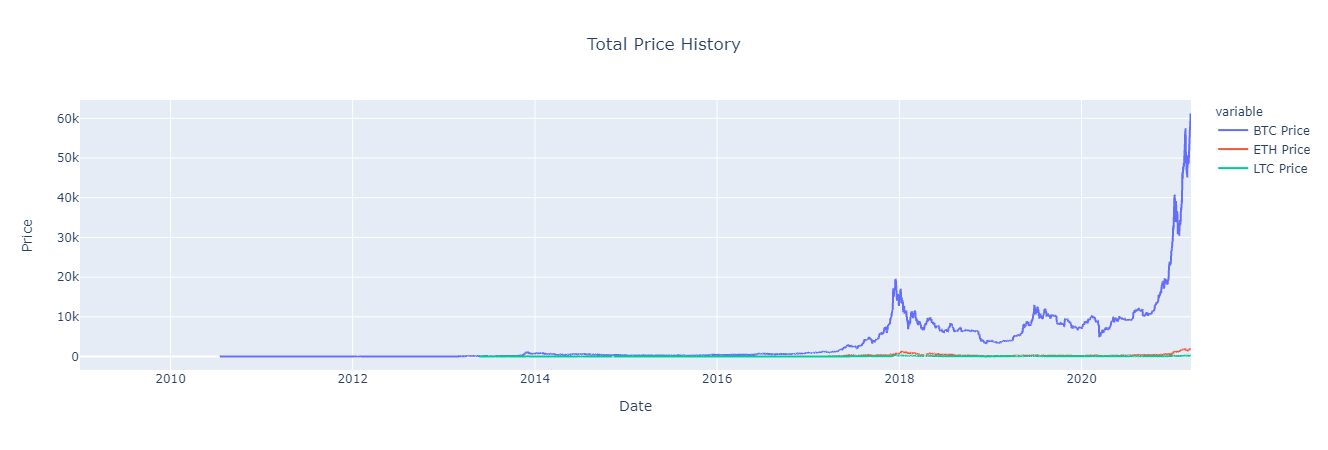

In [85]:
total_price_history()

## Daily Return Over Time

In [88]:
# Plotting Daily Return over Time
def total_daily_return_history():
    """Total Daily Return History"""
        
    total_daily_return_linechart = px.line(all_crypto_data, x=all_crypto_data.index, y=["BTC Daily Price Change (%)", "ETH Daily Price Change (%)", "LTC Daily Price Change (%)"], title="Total Daily Return History",
                                    labels={
                                        "Date": "Date",
                                        "BTC Daily Price Change (%)": "BTC Daily Price Change (%)",
                                        "ETH Daily Price Change (%)": "ETH Daily Price Change (%)",
                                        "LTC Daily Price Change (%)": "LTC Daily Price Change (%)",
                                        "value": "Daily Return (%)",
                                        "variable": "Cryptocurrency Legend"
                                    },
                                )

    total_daily_return_linechart.update_layout(
                    title={
                        'x': .5,
                        'xanchor': 'center'
                    })

    return total_daily_return_linechart

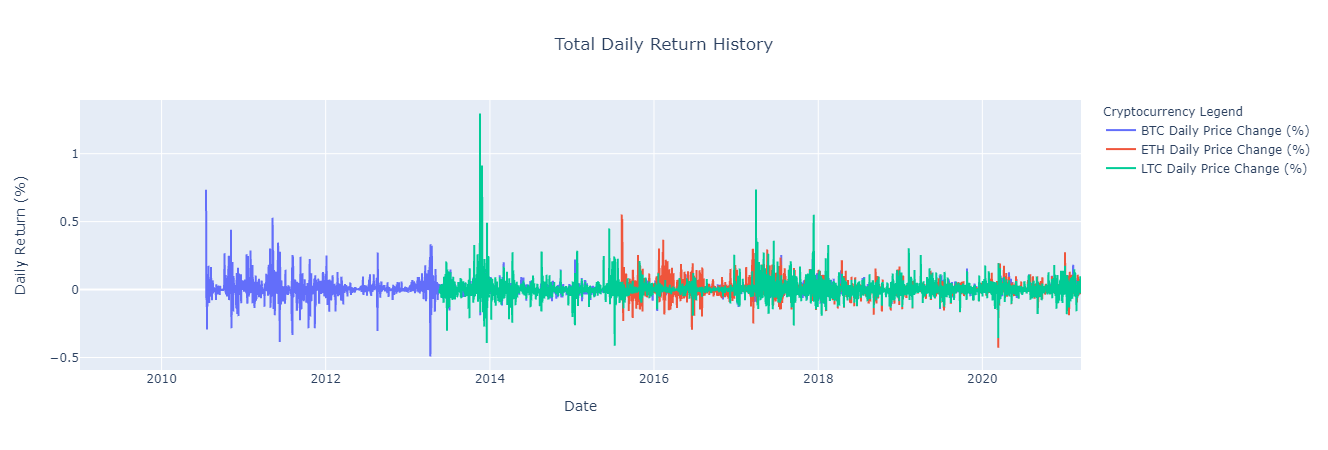

In [89]:
total_daily_return_history()

## Cumulative Return Over Time

In [90]:
# Plotting Daily Return over Time
def total_cumulative_return_history():
    """Total Cumulative Return History"""
        
    total_cumulative_return_linechart = px.line(all_crypto_data, x=all_crypto_data.index, y=["BTC Cumulative Return (%)", "ETH Cumulative Return (%)", "LTC Cumulative Return (%)"], title="Total Cumulative Return History",
                                    labels={
                                        "Date": "Date",
                                        "BTC Cumulative Return (%)": "BTC Cumulative Return (%)",
                                        "ETH Cumulative Return (%)": "ETH Cumulative Return (%)",
                                        "LTC Cumulative Return (%)": "LTC Cumulative Return (%)",
                                        "value": "Cumulative Return (%)",
                                        "variable": "Cryptocurrency Legend"
                                    },
                                )

    total_cumulative_return_linechart.update_layout(
                    title={
                        'x': .5,
                        'xanchor': 'center'
                    })

    return total_cumulative_return_linechart


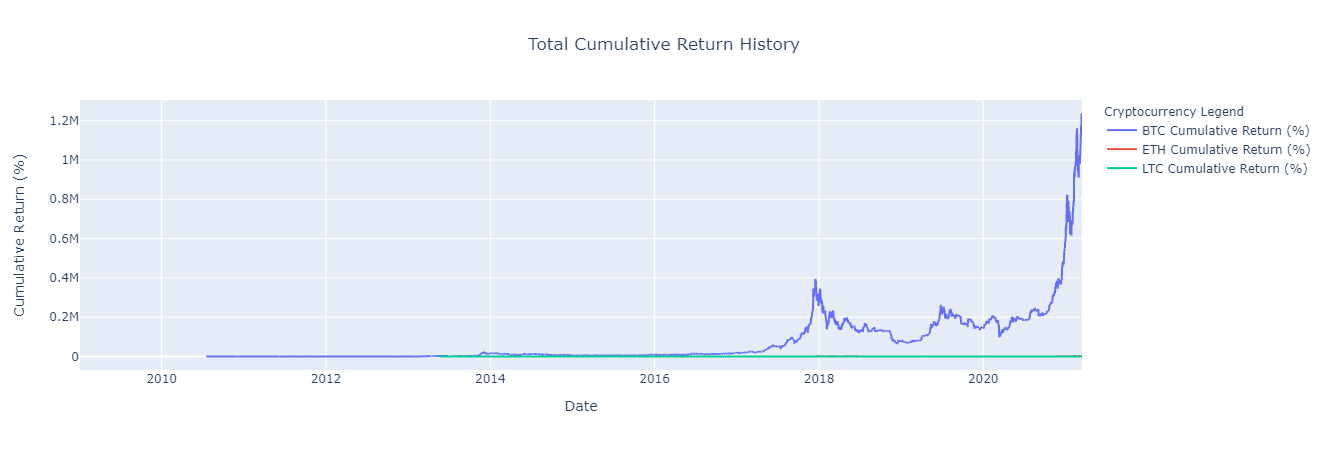

In [91]:
total_cumulative_return_history()

## Volume History

In [65]:
# Plotting Volume over Time
def total_volume_history():
    """Total Volume History"""
        
    total_volume_linechart = px.line(all_crypto_data, x=all_crypto_data.index, y=["BTC Volume", "ETH Volume", "LTC Volume"], title="Total Volume History",
                                    labels={
                                        "Date": "Date",
                                        "BTC Volume": "BTC Volume",
                                        "ETH Volume": "ETH Volume",
                                        "LTC Volume": "LTC Volume",
                                        "value": "Volume",
                                        "variable": "Cryptocurrency Legend"
                                    },
                                )

    total_volume_linechart.update_layout(
                    title={
                        'x': .5,
                        'xanchor': 'center'
                    })

    return total_volume_linechart

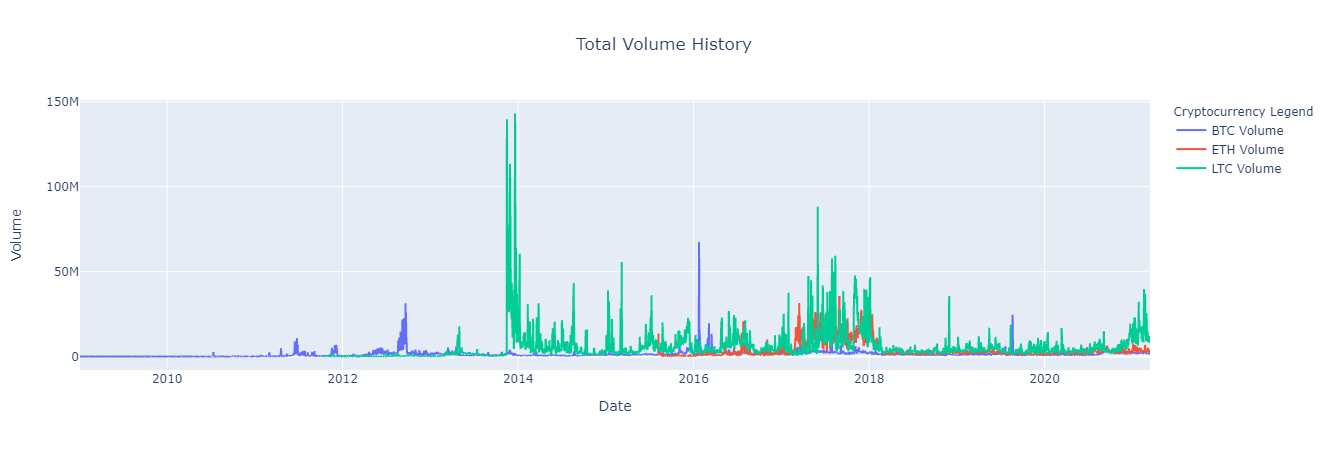

In [66]:
total_volume_history()

## Market Capitalization

In [92]:
# Plotting Market Cap over Time
def total_mkt_cap_history():
    """Total Market Cap History"""
        
    total_mkt_cap_linechart = px.line(all_crypto_data, x=all_crypto_data.index, y=["BTC Market Cap", "ETH Market Cap", "LTC Market Cap"], title="Total Market Cap History",
                                    labels={
                                        "Date": "Date",
                                        "BTC Market Cap": "BTC Market Cap",
                                        "ETH Market Cap": "ETH Market Cap",
                                        "LTC Market Cap": "LTC Market Cap",
                                        "value": "Market Cap",
                                        "variable": "Cryptocurrency Legend"
                                    },
                                )

    total_mkt_cap_linechart.update_layout(
                    title={
                        'x': .5,
                        'xanchor': 'center'
                    })

    return total_mkt_cap_linechart

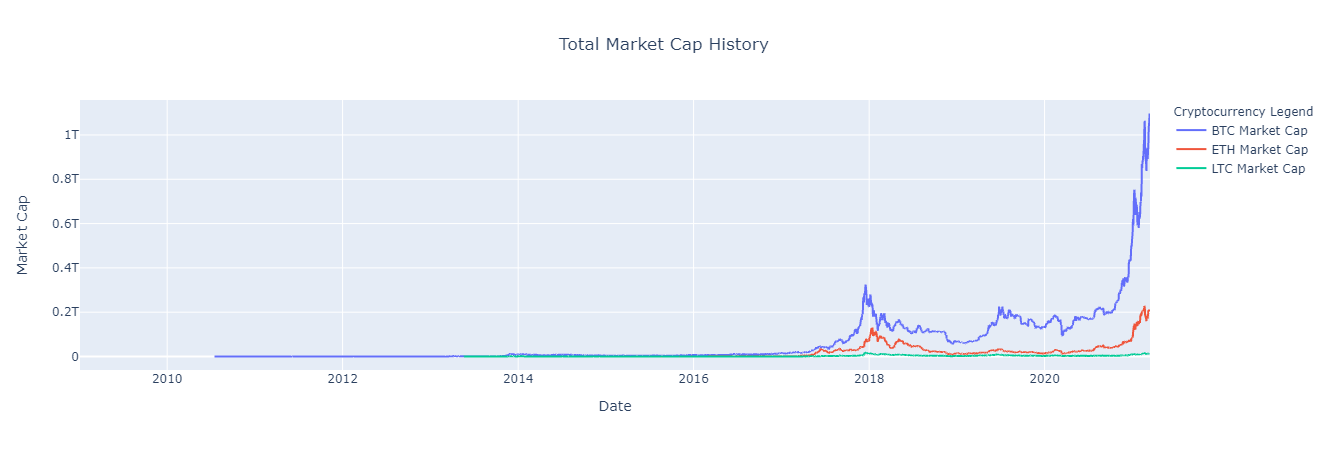

In [93]:
total_mkt_cap_history()